<a href="https://colab.research.google.com/github/elifulton/BW_2/blob/master/BW_2/Eli_Fulton_DS19_BW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [1]:
# Here, we import pandas as well as the csvs for our dataframes

import pandas as pd

df_95 = pd.read_csv('/content/new_york_tree_census_1995.csv')
df_05 = pd.read_csv('/content/new_york_tree_census_2005.csv')
df_15 = pd.read_csv('/content/new_york_tree_census_2015.csv')
df_species = pd.read_csv('/content/new_york_tree_species.csv')

# Data Cleaning

## 1995 census data

In [2]:
# drop inconsistent features

df_95 = df_95.drop(labels=['recordid', 'house_number', 'street', 'species', 'longitude', 'latitude', 'segmentid', 'location', 'x', 'y', 'zip_original', 'cb_original', 'censusblock_2010', 'support_structure', 'wires', 'site', 'sidewalk_condition'], axis=1)

In [3]:
# rename columns in preparation for df_total later on

df_95.rename(columns={'diameter':'tree_dbh', 'nta_2010':'nta', 'zip_new':'zipcode', 'censustract_2010':'boro_ct', 'cb_new':'cb_num'}, inplace=True) 

In [4]:
df_95.head()

address  tree_dbh  ...        spc_common              spc_latin
0     73-031 57 AV         6  ...           OAK PIN      QUERCUS PALUSTRIS
1  2434 HOFFMAN ST        10  ...       HONEYLOCUST  GLEDITSIA TRIACANTHOS
2  33 MULBERRY CIR        21  ...  OAK NORTHERN RED          QUERCUS RUBRA
3    79-037 213 ST        15  ...      MAPLE NORWAY       ACER PLATANOIDES
4    68-015 172 ST         7  ...      MAPLE NORWAY       ACER PLATANOIDES

[5 rows x 10 columns]

## 2005 census data

In [5]:
# drop inconsistent features

df_05 = df_05.drop(labels=['objectid', 'cen_year', 'tree_loc', 'pit_type', 'soil_lvl', 'vert_other', 'vert_pgrd', 'vert_tgrd', 'vert_wall', 'horz_blck', 'horz_grate', 'horz_plant', 'horz_other', 'wire_htap', 'wire_prime', 'wire_2nd', 'wire_other', 'inf_canopy', 'inf_guard', 'inf_wires', 'inf_paving', 'inf_outlet', 'inf_shoes', 'inf_lights', 'inf_other', 'trunk_dmg', 'zip_city', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'nta_name', 'x_sp', 'y_sp', 'objectid_1', 'sidw_crack', 'sidw_raise'], axis=1)

In [6]:
# drop entries with null nta values

df_05 = df_05.dropna(subset=['nta'])

In [7]:
# rename columns in preparation for df_total later on

df_05.rename(columns = {'location_1':'address', 'boroname':'borough'}, inplace=True)

In [8]:
df_05.head()

tree_dbh     status  ...    boro_ct                address
0        9.0       Good  ...        NaN  235 BROOKFIELD AVENUE
3        7.0       Good  ...  4011700.0        23-59 36 STREET
6       11.0       Good  ...  3003900.0    491 ATLANTIC AVENUE
9       23.0       Good  ...  3014000.0         8306 10 AVENUE
12      10.0  Excellent  ...  4042700.0       106-26 50 AVENUE

[5 rows x 10 columns]

## 2015 census data

In [9]:
# drop inconsistent features

df_15 = df_15.drop(labels=['tree_id', 'block_id', 'created_at', 'stump_diam', 'curb_loc', 'health', 'steward', 'guards', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'zip_city', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'nta_name', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'sidewalk'], axis=1)

In [10]:
# rename boroname to borough in preparation for df_total

df_15.rename(columns={'boroname':'borough'}, inplace=True)

In [11]:
# convert the spc_latin and spc_common columns to uppercase, to be more consistent with other dataframes

df_15['spc_latin'] = df_15['spc_latin'].str.upper() 
df_15['spc_common'] = df_15['spc_common'].str.upper() 

In [12]:
# drop entries with null spc_common values

df_15 = df_15.dropna(subset=['spc_common'])

In [13]:
df_15.head()

tree_dbh status                           spc_latin  ...   borough   nta  boro_ct
0        10  Alive              FRAXINUS PENNSYLVANICA  ...    Queens  QN37  4125700
1         9  Alive  GLEDITSIA TRIACANTHOS VAR. INERMIS  ...    Queens  QN28  4030902
2         7  Alive                    PYRUS CALLERYANA  ...    Queens  QN76  4028800
3        10  Alive                    PYRUS CALLERYANA  ...  Brooklyn  BK31  3005000
4         4  Alive                   PRUNUS VIRGINIANA  ...    Queens  QN12  4095400

[5 rows x 10 columns]

## Total (concatenated) census data

In [14]:
# concatenate the dataframes to make df_total, a dataframe with every entry

df_total = pd.concat([df_95, df_05, df_15])

In [15]:
df_total.head()

address  tree_dbh  ...        spc_common              spc_latin
0     73-031 57 AV       6.0  ...           OAK PIN      QUERCUS PALUSTRIS
1  2434 HOFFMAN ST      10.0  ...       HONEYLOCUST  GLEDITSIA TRIACANTHOS
2  33 MULBERRY CIR      21.0  ...  OAK NORTHERN RED          QUERCUS RUBRA
3    79-037 213 ST      15.0  ...      MAPLE NORWAY       ACER PLATANOIDES
4    68-015 172 ST       7.0  ...      MAPLE NORWAY       ACER PLATANOIDES

[5 rows x 10 columns]

# Model Time!

## Data Split

In [16]:
# a standard random train test split of our data to avoid leakage: the target is 'status' or health of the tree

from sklearn.model_selection import train_test_split

target = 'status'
y = df_total[target]
X = df_total.drop(target, axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# baseline accuracy is pretty low at about 40.8 percent, but let's see if a logistic regression can get over this low bar

print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.408503009348188


## Logistic Regression Model

In [18]:
# import model packages

!pip install category_encoders

from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# create pipline to ordinal encode and impute the entire dataframe, then perform a logistic regression

logistic_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression()
)

# fit the training data to the model

logistic_model.fit(X_train, y_train);

     |████████████████████████████████| 81kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
# it actually performs slightly worse than the baseline... oof

print('Training Accuracy (LR):', logistic_model.score(X_train, y_train))
print('Validation Accuracy (LR):', logistic_model.score(X_val, y_val))

Training Accuracy (LR): 0.4007282003910786
Validation Accuracy (LR): 0.4005945306632211


## Random Forest Classification Model

In [20]:
# importing the random forest classification package

from sklearn.ensemble import RandomForestClassifier

# new pipeline for random forest, again with ordinal encoding and imputing

forest_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=15)
)

# fitting training data to forest model

forest_model.fit(X_train, y_train);

In [21]:
# this time we clear the baseline by a good bit

print('Training Accuracy (RF):', forest_model.score(X_train, y_train))
print('Validation Accuracy (RF):', forest_model.score(X_val, y_val))

Training Accuracy (RF): 0.7986319444144685
Validation Accuracy (RF): 0.7940380027683374


## Feature Importances (Random Forest Model)

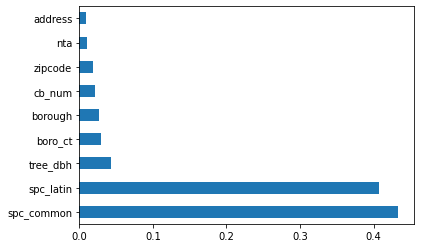

In [22]:
# creating a basic feature importances bar graph from the random forest model

feature_imp = forest_model.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
pd.Series(feature_imp, features).sort_values(ascending=False).plot(kind='barh')

# Creating Map Visuals

## Map Dataframe

In [23]:
# setting up queens data for the map_df, which will be used for making the chloropleth

queens_good = (df_total[df_total['borough'] == 'Queens']['status'] == 'Good').sum() + (df_total[df_total['borough'] == 'Queens']['status'] == 'Excellent').sum() + (df_total[df_total['borough'] == 'Queens']['status'] == 'Fair').sum()
queens_bad = (df_total[df_total['borough'] == 'Queens']['status'] == 'Poor').sum() + (df_total[df_total['borough'] == 'Queens']['status'] == 'Dead').sum() + (df_total[df_total['borough'] == 'Queens']['status'] == 'Critical').sum()
queens_total = queens_good + queens_bad

# brooklyn data for map_df

brooklyn_good = (df_total[df_total['borough'] == 'Brooklyn']['status'] == 'Good').sum() + (df_total[df_total['borough'] == 'Brooklyn']['status'] == 'Excellent').sum() + (df_total[df_total['borough'] == 'Brooklyn']['status'] == 'Fair').sum()
brooklyn_bad = (df_total[df_total['borough'] == 'Brooklyn']['status'] == 'Poor').sum() + (df_total[df_total['borough'] == 'Brooklyn']['status'] == 'Dead').sum() + (df_total[df_total['borough'] == 'Brooklyn']['status'] == 'Critical').sum()
brooklyn_total = brooklyn_good + brooklyn_bad

# bronx data for map_df

bronx_good = (df_total[df_total['borough'] == 'Bronx']['status'] == 'Good').sum() + (df_total[df_total['borough'] == 'Bronx']['status'] == 'Excellent').sum() + (df_total[df_total['borough'] == 'Bronx']['status'] == 'Fair').sum()
bronx_bad = (df_total[df_total['borough'] == 'Bronx']['status'] == 'Poor').sum() + (df_total[df_total['borough'] == 'Bronx']['status'] == 'Dead').sum() + (df_total[df_total['borough'] == 'Bronx']['status'] == 'Critical').sum()
bronx_total = bronx_good + bronx_bad

# staten island data for map_df

staten_island_good = (df_total[df_total['borough'] == 'Staten Island']['status'] == 'Good').sum() + (df_total[df_total['borough'] == 'Staten Island']['status'] == 'Excellent').sum() + (df_total[df_total['borough'] == 'Staten Island']['status'] == 'Fair').sum()
staten_island_bad = (df_total[df_total['borough'] == 'Staten Island']['status'] == 'Poor').sum() + (df_total[df_total['borough'] == 'Staten Island']['status'] == 'Dead').sum() + (df_total[df_total['borough'] == 'Staten Island']['status'] == 'Critical').sum()
staten_island_total = staten_island_good + staten_island_bad

# manhattan data for map_df

manhattan_good = (df_total[df_total['borough'] == 'Manhattan']['status'] == 'Good').sum() + (df_total[df_total['borough'] == 'Manhattan']['status'] == 'Excellent').sum() + (df_total[df_total['borough'] == 'Manhattan']['status'] == 'Fair').sum()
manhattan_bad = (df_total[df_total['borough'] == 'Manhattan']['status'] == 'Poor').sum() + (df_total[df_total['borough'] == 'Manhattan']['status'] == 'Dead').sum() + (df_total[df_total['borough'] == 'Manhattan']['status'] == 'Critical').sum()
manhattan_total = manhattan_good + manhattan_bad

# creating map_df with empty columns borough, num_good_trees, num_bad_trees, and total_trees

map_df = pd.DataFrame(columns=['borough', 'num_good_trees', 'num_bad_trees', 'total_trees'])

# adding data created before to map_df, filling it in

map_df = map_df.append({'borough':'Queens', 'num_good_trees':queens_good, 'num_bad_trees':queens_bad, 'total_trees':queens_total}, ignore_index=True)
map_df = map_df.append({'borough':'Brooklyn', 'num_good_trees':brooklyn_good, 'num_bad_trees':brooklyn_bad, 'total_trees':brooklyn_total}, ignore_index=True)
map_df = map_df.append({'borough':'Bronx', 'num_good_trees':bronx_good, 'num_bad_trees':bronx_bad, 'total_trees':bronx_total}, ignore_index=True)
map_df = map_df.append({'borough':'Staten Island', 'num_good_trees':staten_island_good, 'num_bad_trees':staten_island_bad, 'total_trees':staten_island_total}, ignore_index=True)
map_df = map_df.append({'borough':'Manhattan', 'num_good_trees':manhattan_good, 'num_bad_trees':manhattan_bad, 'total_trees':manhattan_total}, ignore_index=True)

# engineering percentage of good and bad trees per borough

map_df['percentage_good'] = map_df['num_good_trees'] / map_df['total_trees']
map_df['percentage_bad'] = map_df['num_bad_trees'] / map_df['total_trees']

In [24]:
map_df

borough num_good_trees  ... percentage_good percentage_bad
0         Queens         391927  ...          0.8893         0.1107
1       Brooklyn         226200  ...        0.904138      0.0958618
2          Bronx          88887  ...        0.879129       0.120871
3  Staten Island          69335  ...        0.933968      0.0660318
4      Manhattan          80739  ...        0.884404       0.115596

[5 rows x 6 columns]

## Maps

In [25]:
# importing folium, then setting up the map object with appropriate coordinates

import folium
map = folium.Map(location=[40.693943, -73.985880])

In [26]:
# using add_to method to make our map into a chloropleth with the following parameters, to show percentage of good trees by borough

folium.Choropleth(
    geo_data='/content/Borough Boundaries.geojson',
    data=map_df,
    columns=['borough', 'percentage_good'],
    key_on='feature.properties.boro_name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.3
).add_to(map)

In [27]:
map

In [32]:
# creating second map, which is identical, but showing percentage of bad trees

map_2 = folium.Map(location=[40.693943, -73.985880])

folium.Choropleth(
    geo_data='/content/Borough Boundaries.geojson',
    data=map_df,
    columns=['borough', 'percentage_bad'],
    key_on='feature.properties.boro_name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.3
).add_to(map_2)

In [33]:
map_2